In [72]:
import networkx as nx
import matplotlib.pyplot as plt 
import math

In [73]:
G = nx.DiGraph()

# Declare list nodes
nodeList = [
    "S3A", "S3B", "S3G", "S3H",
    "S2C", "S2D", "S2I",
    "S1E", "S1L",
    "TC",
    "R1K", "R1M",
    "R2N", "R2O",
    "R3R", "R3S", "R3T"
]


# Add node
for i in nodeList:
    G.add_node(i)

# Coloring nodes for easier to debug
nodeColor = ["#DDF9E6"]*4 + ["#83DE8F"]*3 + ["#70BF7B"]*2 + ["#E4BE01"] + ["#FC2E50"]*2 + ["#FC7A8F"]*2 + ["#F9CAD2"]*3

In [74]:
# Add edges to the graph

G.add_edge("S3A", "S2C", weight=1)
G.add_edge("S3B", "S2D", weight=3)
G.add_edge("S3G", "S2I", weight=1)
G.add_edge("S3H", "S2I", weight=2)

G.add_edge("S2C", "S1E", weight=2)
G.add_edge("S2C", "R1K", weight=1)
G.add_edge("R1K", "S2C", weight=1)
G.add_edge("S2D", "S1E", weight=2)
G.add_edge("S2I", "S1L", weight=4)
G.add_edge("S2I", "R1K", weight=6)
G.add_edge("R1K", "S2I", weight=6)
G.add_edge("S2I", "R1M", weight=5)
G.add_edge("R1M", "S2I", weight=5)
G.add_edge("S1E", "TC", weight=3)
G.add_edge("S1L", "TC", weight=6)

G.add_edge("TC", "R1K", weight=4)
G.add_edge("TC", "R1M", weight=3)

G.add_edge("R1K", "R2N", weight=4)
G.add_edge("R1M", "R2O", weight=2)

G.add_edge("R2N", "R3R", weight=1)
G.add_edge("R2N", "R3S", weight=5)
G.add_edge("R2O", "R3T", weight=4)

G.add_edge("R3S", "R3T", weight=2)

# Custome the graph layout when printing
pos = nx.spring_layout(G, k=10)


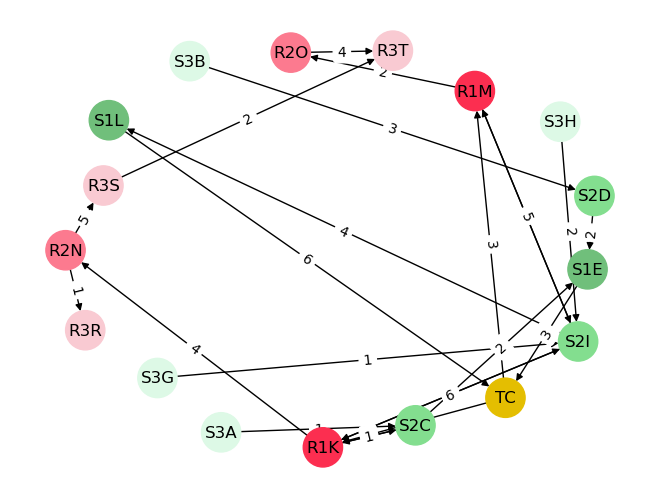

In [75]:
# Draw graph
nx.draw(G, pos, with_labels=True, node_color = nodeColor, node_size=800)

# Declare edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

# Display edges' weights
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [76]:
def calculate_Forman_Ricci(G, edge, nodeWeight=1):
    u, v = edge
    edgeW = G[u][v]['weight']
    
#   Get list of in-edge of u
    inEdgeOfU = G.in_edges(u)

#   Get list of out-edge of v
    outEdgeOfV = G[v]
    
    sumInEdge = 0
    sumOutEdge = 0
    
    
    for u1, v1 in inEdgeOfU:
        sumInEdge += nodeWeight/math.sqrt(edgeW*G[u1][v1]['weight'])

    for u1 in outEdgeOfV:
        sumOutEdge += nodeWeight/math.sqrt(edgeW*G[v][u1]['weight'])

    return edgeW*(nodeWeight/edgeW - sumInEdge) + edgeW*(nodeWeight/edgeW - sumOutEdge)

In [78]:
for edge in G.edges():
    print(edge, calculate_Forman_Ricci(G, edge))


('S3A', 'S2C') 0.29289321881345254
('S3B', 'S2D') 0.7752551286084107
('S3G', 'S2I') 0.644538114036179
('S3H', 'S2I') 0.08308741759015081
('S2C', 'S1E') -1.644923705673916
('S2C', 'R1K') -1.9082482904638631
('S2D', 'S1E') 0.3670068381445477
('S2I', 'S1L') -3.941633915228463
('S2I', 'R1K') -8.951220279537155
('S2I', 'R1M') -6.311216566843446
('S1E', 'TC') -2.315515146567617
('S1L', 'TC') -1.8637033051562737
('TC', 'R1K') -3.787693700234704
('TC', 'R1M') -1.7064483218196198
('R1K', 'S2C') -1.6153550716504106
('R1K', 'S2I') -5.994424600576689
('R1K', 'R2N') -4.710923771927642
('R1M', 'S2I') -3.3218993666609764
('R1M', 'R2O') -0.1560588941479495
('R2N', 'R3R') 1.5
('R2N', 'R3S') -0.6991728188340844
('R2O', 'R3T') 0.5857864376269051
('R3S', 'R3T') 1.367544467966324
